In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
dftrain = pd.read_csv('train.csv', index_col=0)

In [7]:
dftrain.head()

,local_time,country_code,store_address,payment_status,n_of_products,products_total,final_status
order_id,,,,,,,
33446280,14:11:09,AR,55379,PAID,2,11.88,DeliveredStatus
33107339,11:47:41,GT,23487,PAID,2,5.20,DeliveredStatus
32960645,11:53:53,CR,62229,PAID,1,6.03,DeliveredStatus
32089564,20:15:21,ES,29446,PAID,6,6.37,DeliveredStatus
32157739,21:32:16,AR,13917,PAID,1,5.36,CanceledStatus


In [8]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54330 entries, 33446280 to 32695191
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   local_time      54330 non-null  object 
 1   country_code    54330 non-null  object 
 2   store_address   54330 non-null  int64  
 3   payment_status  54330 non-null  object 
 4   n_of_products   54330 non-null  int64  
 5   products_total  54330 non-null  float64
 6   final_status    54330 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 3.3+ MB


In [9]:
dftrain['local_time'] = pd.to_datetime(dftrain.local_time)

In [10]:
dftrain.nunique()

local_time        32905
country_code         23
store_address      5627
payment_status        3
n_of_products        27
products_total     3904
final_status          2
dtype: int64

Numéricas: 
- n_of_products
- products_total 

Categóricas: 
- country_code
- store_address
- payment_status  

Fecha:
- local_time

y:
- final_status

In [11]:
cat_cols = ['country_code', 'store_address','payment_status']
num_cols = ['n_of_products', 'products_total']
date_cols = ['local_time']
target = ['final_status']

In [12]:
dftrain.final_status.value_counts()

DeliveredStatus    48498
CanceledStatus      5832
Name: final_status, dtype: int64

In [13]:
target_map = {k:v for v,k in enumerate(dftrain.final_status.unique())}

<AxesSubplot:xlabel='n_of_products', ylabel='Count'>

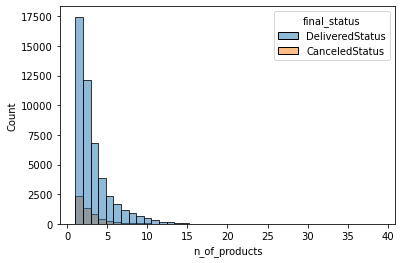

In [14]:
sns.histplot(data=dftrain, x='n_of_products', color='blue', 
             hue='final_status', bins=40)

### 1. ¿Cuáles son los 3 paises en los que más pedidos se realizan?



In [15]:
dftrain.groupby(by='country_code').store_address.count().sort_values(ascending=False).head(3)

country_code
AR    11854
ES    11554
TR     5696
Name: store_address, dtype: int64

### 2. ¿Cuáles son las horas en las que se realizan más pedidos en España?


In [16]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54330 entries, 33446280 to 32695191
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   local_time      54330 non-null  datetime64[ns]
 1   country_code    54330 non-null  object        
 2   store_address   54330 non-null  int64         
 3   payment_status  54330 non-null  object        
 4   n_of_products   54330 non-null  int64         
 5   products_total  54330 non-null  float64       
 6   final_status    54330 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 3.3+ MB


In [17]:
mask = dftrain.country_code == 'ES'

dftrain[mask].groupby(pd.Grouper(key='local_time',freq='h'))\
                .store_address.count()\
                .sort_values(ascending=False)\
                .head(5)

local_time
2021-11-28 20:00:00    1716
2021-11-28 21:00:00    1155
2021-11-28 19:00:00    1128
2021-11-28 13:00:00    1047
2021-11-28 14:00:00     956
Name: store_address, dtype: int64

### 3. ¿Cuál es el precio medio por pedido en la tienda con ID 12513? 


In [18]:
mask = dftrain.store_address == 12513
dftrain[mask].products_total.mean()

17.392244897959184

### 4. Teniendo en cuenta los picos de demanda en España, si los repartidores trabajan en turnos de 8horas.  
Turno 1 (00:00-08:00)  
Turno 2 (08:00-16:00)  
Turno 3 (16:00-00:00)  
Qué porcentaje de repartidores pondrías por cada turno para que sean capaces de hacer frente a los picos de demanda. (ej: Turno 1 el 30%, Turno 2 el 10% y Turno 3 el 60%).

In [19]:
mask = dftrain.country_code == 'ES'
dftrain[mask].groupby(pd.Grouper(key='local_time',freq='8h')).store_address.count() / dftrain[mask].store_address.count()

local_time
2021-11-28 00:00:00    0.001212
2021-11-28 08:00:00    0.388350
2021-11-28 16:00:00    0.610438
Freq: 8H, Name: store_address, dtype: float64

Considerar que hablamos de todo el territorio, con lo que, teniendo en cuenta los turno, el número de tiendas y desconocemos cuantos repartidores hay, estos valores son aproximados (y hay que considerar un mínimo de repartidores en las tiendas que tienen actividad en el primer turno)

In [20]:
dftrain[mask].groupby(pd.Grouper(key='local_time',freq='8h')).store_address.nunique() 

local_time
2021-11-28 00:00:00      4
2021-11-28 08:00:00    679
2021-11-28 16:00:00    732
Freq: 8H, Name: store_address, dtype: int64

In [21]:
dftrain[mask].store_address.nunique()

822

Hay 4 tiendas que han repartido en el Turno 1, del total de 822, un 0.4% del total, y han servido el 0.12% de pedidos del dia

In [22]:
dftrain['status'] = dftrain.final_status.map(target_map)

In [23]:
dftrain.corr()

,store_address,n_of_products,products_total,status
store_address,1.000000,-0.176088,-0.202292,0.039823
n_of_products,-0.176088,1.000000,0.407848,-0.018167
products_total,-0.202292,0.407848,1.000000,0.019999
status,0.039823,-0.018167,0.019999,1.000000


### 5. Realiza un modelo predictivo de machine learning
 ... a partir del dataset 'train.csv' en el cual a partir de las variables predictoras que se entregan en el dataset 'test_X' se pueda predecir si el pedido se cancelará o no (columna 'final_status'). Siendo:
Para simplificar, podeis asignar los valores 'CanceledStatus' a 0 y los valores 'DeliveredStatus' a 1.

> 0 = CanceledStatus  
> 1 = DeliveredStatus

In [24]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier


In [25]:
dftrain['hour'] = dftrain.local_time.dt.hour.astype(int)

In [26]:
for col in cat_cols:
    dftrain[col] = dftrain[col].astype('category')

In [27]:
clf = XGBClassifier(objective=f1_score, enable_categorical=True, use_label_encoder=False)

In [28]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54330 entries, 33446280 to 32695191
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   local_time      54330 non-null  datetime64[ns]
 1   country_code    54330 non-null  category      
 2   store_address   54330 non-null  category      
 3   payment_status  54330 non-null  category      
 4   n_of_products   54330 non-null  int64         
 5   products_total  54330 non-null  float64       
 6   final_status    54330 non-null  object        
 7   status          54330 non-null  int64         
 8   hour            54330 non-null  int64         
dtypes: category(3), datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 3.3+ MB


In [29]:
dftrain.columns

Index(['local_time', 'country_code', 'store_address', 'payment_status',
       'n_of_products', 'products_total', 'final_status', 'status', 'hour'],
      dtype='object')

In [30]:
train_cols = ['country_code', 'store_address', 'payment_status',
       'n_of_products', 'products_total', 'hour']
target = ['status']

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PowerTransformer, RobustScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score, confusion_matrix

from tqdm.notebook import tqdm

from lightgbm import LGBMClassifier

import time


In [32]:
SEED = 42
TEST_SIZE = 0.2
TESTING = True


def make_pipeline(data, columns, model):
    cols_num = data[columns].select_dtypes(include=['int','float']).columns.to_list()
    cols_cat = data[columns].select_dtypes(include=['object']).columns.to_list()
    cols_date = data[columns].select_dtypes(include=['datetime']).columns.to_list()
    
    ct = ColumnTransformer(
             transformers=[('num', MinMaxScaler(), cols_num),
                          ('cat',OneHotEncoder(), cols_cat)])
    
    pipeline = Pipeline( steps=[('transformer', ct),
                               ('clasif', model)])
    
    return pipeline


def run_experiment(train, test=None, columns=[], model=LinearRegression()):
    if test is None:
        X_train, X_test, y_train, y_test = train_test_split(*train,  
                                                        test_size=TEST_SIZE, random_state=SEED)
    else:
        X_train, y_train = train
        X_test, y_test = test
        
#     pipe = make_pipeline(X_train, columns, model)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    return f1_score(y_test, np.round(y_pred), average='macro'), model
  

In [33]:
dftrain.reset_index(inplace=True)

In [34]:
from sklearn.model_selection import StratifiedKFold, KFold

FOLDS = 6
dftrain['fold'] = -1

skf = StratifiedKFold(n_splits=FOLDS, random_state=42, shuffle=True)

for fold, (train_idx, val_idx) in enumerate(skf.split(dftrain[train_cols], dftrain[target])):
    print(fold, train_idx.shape, val_idx.shape)
    dftrain.loc[val_idx, 'fold'] = fold

0 (45275,) (9055,)
1 (45275,) (9055,)
2 (45275,) (9055,)
3 (45275,) (9055,)
4 (45275,) (9055,)
5 (45275,) (9055,)


In [35]:
preds_oof = []
final_val_preds = {}
for fold in range(FOLDS):
    xtrain = dftrain[dftrain.fold != fold]
    xval = dftrain[dftrain.fold == fold]
    
    
    valid_ids = xval.index.to_list()
    
    ytrain = xtrain[target]
    yval = xval[target]
    
    params = {'learning_rate': 0.04113078629577159,
             'reg_lambda': 2.2529987562292753e-05,
             'reg_alpha': 2.1553668505558285e-06,
             'subsample': 0.5079109680078884,
             'colsample_bytree': 0.8912508896212556,
             'max_depth': 7,
             'objective': 'binary:logistic',
             'eval_metric': 'auc'}
    
    xtrain = xtrain[train_cols]
    xval = xval[train_cols]
    
    model = LGBMClassifier(is_unbalance=True)
    pipe = make_pipeline(xtrain, train_cols, model)
    f1, model = run_experiment((xtrain,ytrain),(xval,yval), model=pipe )
    
    preds_valid = model.predict_proba(xval)
    final_val_preds.update(dict(zip(valid_ids, preds_valid)))
    print(f'Fold {fold}\t f1: {f1:.5f}')
    

/opt/homebrew/Caskroom/miniforge/base/envs/py38_ds/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/Caskroom/miniforge/base/envs/py38_ds/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/Caskroom/miniforge/base/envs/py38_ds/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/Caskroom/miniforge/base/envs/py38_ds/lib/python3.8/site-packages/sklearn/

Fold 0	 f1: 0.49112
Fold 1	 f1: 0.49964


/opt/homebrew/Caskroom/miniforge/base/envs/py38_ds/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/Caskroom/miniforge/base/envs/py38_ds/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/Caskroom/miniforge/base/envs/py38_ds/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/Caskroom/miniforge/base/envs/py38_ds/lib/python3.8/site-packages/sklearn/

Fold 2	 f1: 0.49537
Fold 3	 f1: 0.49213


/opt/homebrew/Caskroom/miniforge/base/envs/py38_ds/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/Caskroom/miniforge/base/envs/py38_ds/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/Caskroom/miniforge/base/envs/py38_ds/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/Caskroom/miniforge/base/envs/py38_ds/lib/python3.8/site-packages/sklearn/

Fold 4	 f1: 0.50151
Fold 5	 f1: 0.50321


In [36]:
pd.DataFrame.from_dict(final_val_preds, orient='index').sort_index()

,0,1
0,0.628221,0.371779
1,0.627371,0.372629
2,0.593799,0.406201
3,0.499883,0.500117
4,0.521867,0.478133
...,...,...
54325,0.567477,0.432523
54326,0.422768,0.577232
54327,0.447432,0.552568
54328,0.817990,0.182010


In [37]:
for th in np.linspace(0,1,11):
    dftemp = pd.DataFrame.from_dict(final_val_preds, orient='index').sort_index().loc[:,1]
    res = (dftemp > th).astype(int)
    print(f'Threshold: {th}')
    print(f1_score(dftrain.status, res, average='macro'))
    print(confusion_matrix(dftrain.status, res))

Threshold: 0.0
0.09693826667996411
[[    0 48498]
 [    0  5832]]
Threshold: 0.1
0.09796644243736873
[[   49 48449]
 [    4  5828]]
Threshold: 0.2
0.11284968785436605
[[  768 47730]
 [   60  5772]]
Threshold: 0.30000000000000004
0.15340396103904927
[[ 2842 45656]
 [  220  5612]]
Threshold: 0.4
0.25052422446096995
[[ 8740 39758]
 [  774  5058]]
Threshold: 0.5
0.4973285035324155
[[33543 14955]
 [ 3400  2432]]
Threshold: 0.6000000000000001
0.5439624711699174
[[45308  3190]
 [ 4990   842]]
Threshold: 0.7000000000000001
0.5190792622688153
[[47528   970]
 [ 5468   364]]
Threshold: 0.8
0.4901508538219047
[[48275   223]
 [ 5714   118]]
Threshold: 0.9
0.4727927520830744
[[48483    15]
 [ 5825     7]]
Threshold: 1.0
0.47164196522348
[[48498     0]
 [ 5832     0]]


In [38]:
res

0        0
1        0
2        0
3        0
4        0
        ..
54325    0
54326    0
54327    0
54328    0
54329    0
Name: 1, Length: 54330, dtype: int64

##### Check if we can add feautres

- Number of deliveries in the last hour by shop

In [39]:
dftrain.groupby(by=['store_address', 'hour']).count()['order_id']

store_address  hour
190            0       0
               1       0
               2       0
               3       0
               4       0
                      ..
75236          19      0
               20      0
               21      1
               22      0
               23      0
Name: order_id, Length: 135048, dtype: int64

<AxesSubplot:xlabel='order_id', ylabel='Count'>

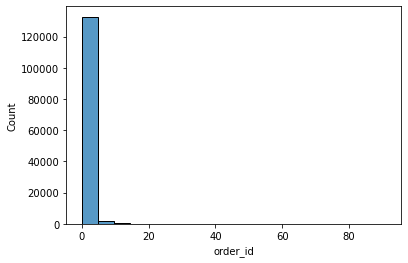

In [40]:
sns.histplot(dftrain.groupby(['store_address','hour']).count()['order_id'])

In [41]:
dftrain.groupby(['store_address',pd.Grouper(key='local_time',freq='30min')]).order_id.count()


store_address  local_time         
190            2021-11-28 00:00:00    0
               2021-11-28 00:30:00    0
               2021-11-28 01:00:00    0
               2021-11-28 01:30:00    0
               2021-11-28 02:00:00    0
                                     ..
75236          2021-11-28 21:30:00    1
               2021-11-28 22:00:00    0
               2021-11-28 22:30:00    0
               2021-11-28 23:00:00    0
               2021-11-28 23:30:00    0
Name: order_id, Length: 270096, dtype: int64

In [42]:
mask = dftrain.store_address == 190
dftrain[mask]

,order_id,local_time,country_code,store_address,payment_status,n_of_products,products_total,final_status,status,hour,fold
17112,33088357,2021-11-28 16:47:44,ES,190,PAID,1,2.9,DeliveredStatus,0,16,4
17670,32528098,2021-11-28 10:19:38,ES,190,PAID,1,2.8,DeliveredStatus,0,10,4
18797,32688558,2021-11-28 17:28:49,ES,190,PAID,2,8.6,DeliveredStatus,0,17,5
28177,33454177,2021-11-28 18:53:53,ES,190,PAID,1,4.5,DeliveredStatus,0,18,2
29234,32650972,2021-11-28 09:34:28,ES,190,PAID,2,5.8,DeliveredStatus,0,9,2
34955,32525617,2021-11-28 08:09:53,ES,190,PAID,2,5.1,DeliveredStatus,0,8,2
39105,33045745,2021-11-28 10:00:10,ES,190,PAID,2,5.1,DeliveredStatus,0,10,5
40072,32951069,2021-11-28 17:46:48,ES,190,PAID,1,2.8,DeliveredStatus,0,17,4
41832,32692825,2021-11-28 18:03:59,ES,190,PAID,1,2.8,DeliveredStatus,0,18,2


<AxesSubplot:xlabel='hour', ylabel='Density'>

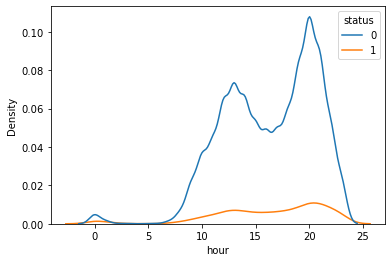

In [43]:
sns.kdeplot(data=dftrain, x='hour', hue='status',  )

##### Rolling sum

In [44]:
dftrain.head()

,order_id,local_time,country_code,store_address,payment_status,n_of_products,products_total,final_status,status,hour,fold
0,33446280,2021-11-28 14:11:09,AR,55379,PAID,2,11.88,DeliveredStatus,0,14,4
1,33107339,2021-11-28 11:47:41,GT,23487,PAID,2,5.20,DeliveredStatus,0,11,2
2,32960645,2021-11-28 11:53:53,CR,62229,PAID,1,6.03,DeliveredStatus,0,11,0
3,32089564,2021-11-28 20:15:21,ES,29446,PAID,6,6.37,DeliveredStatus,0,20,2
4,32157739,2021-11-28 21:32:16,AR,13917,PAID,1,5.36,CanceledStatus,1,21,5


In [45]:
group = dftrain.groupby(by=['store_address', pd.Grouper(key='local_time',freq='30min')])

In [46]:
group.order_id.count().rolling(3).sum()

store_address  local_time         
190            2021-11-28 00:00:00    NaN
               2021-11-28 00:30:00    NaN
               2021-11-28 01:00:00    0.0
               2021-11-28 01:30:00    0.0
               2021-11-28 02:00:00    0.0
                                     ... 
75236          2021-11-28 21:30:00    1.0
               2021-11-28 22:00:00    1.0
               2021-11-28 22:30:00    1.0
               2021-11-28 23:00:00    0.0
               2021-11-28 23:30:00    0.0
Name: order_id, Length: 270096, dtype: float64

#### stores and status

In [47]:
dftrain.store_address.nunique()

5627

In [48]:
dftrain.shape

(54330, 11)

In [49]:
dftrain.final_status.value_counts()

DeliveredStatus    48498
CanceledStatus      5832
Name: final_status, dtype: int64

In [50]:
mask = dftrain.store_address.value_counts()
dftrain[dftrain.store_address.isin(mask.index[mask==1])].final_status.value_counts()

DeliveredStatus    859
CanceledStatus     267
Name: final_status, dtype: int64

In [51]:
dftrain.groupby('hour').final_status.value_counts()

hour  final_status   
0     DeliveredStatus     305
      CanceledStatus      125
1     DeliveredStatus      93
      CanceledStatus       54
2     CanceledStatus       18
      DeliveredStatus       9
3     DeliveredStatus      11
      CanceledStatus        3
4     CanceledStatus        6
5     DeliveredStatus       6
      CanceledStatus        1
6     DeliveredStatus       9
      CanceledStatus        5
7     DeliveredStatus      81
      CanceledStatus       18
8     DeliveredStatus     350
      CanceledStatus       59
9     DeliveredStatus    1211
      CanceledStatus      116
10    DeliveredStatus    2018
      CanceledStatus      203
11    DeliveredStatus    2366
      CanceledStatus      235
12    DeliveredStatus    3543
      CanceledStatus      359
13    DeliveredStatus    4016
      CanceledStatus      429
14    DeliveredStatus    3591
      CanceledStatus      351
15    DeliveredStatus    2830
      CanceledStatus      307
16    DeliveredStatus    2613
      CanceledStat

In [52]:
dftrain.groupby('country_code').final_status.value_counts()

country_code  final_status   
AR            DeliveredStatus    10107
              CanceledStatus      1747
BR            CanceledStatus         1
CI            CanceledStatus         3
              DeliveredStatus        3
CL            DeliveredStatus      857
              CanceledStatus       137
CR            DeliveredStatus      926
              CanceledStatus        74
DO            DeliveredStatus      409
              CanceledStatus        39
EC            DeliveredStatus     2031
              CanceledStatus       234
EG            DeliveredStatus     1447
              CanceledStatus       196
ES            DeliveredStatus    10634
              CanceledStatus       920
FR            DeliveredStatus     1754
              CanceledStatus       157
GE            DeliveredStatus      415
              CanceledStatus        70
GT            DeliveredStatus      468
              CanceledStatus        43
IT            DeliveredStatus     2276
              CanceledStatus      

In [53]:
dftrain.groupby('n_of_products').final_status.value_counts()

n_of_products  final_status   
1              DeliveredStatus    17453
               CanceledStatus      2348
2              DeliveredStatus    12142
               CanceledStatus      1373
3              DeliveredStatus     6839
               CanceledStatus       835
4              DeliveredStatus     3863
               CanceledStatus       417
5              DeliveredStatus     2369
               CanceledStatus       281
6              DeliveredStatus     1684
               CanceledStatus       183
7              DeliveredStatus     1186
               CanceledStatus       106
8              DeliveredStatus      917
               CanceledStatus        79
9              DeliveredStatus      667
               CanceledStatus        45
10             DeliveredStatus      527
               CanceledStatus        47
11             DeliveredStatus      328
               CanceledStatus        29
12             DeliveredStatus      198
               CanceledStatus        22
13       

In [54]:
dftrain.groupby('products_total').final_status.value_counts()

products_total  final_status   
0.00            CanceledStatus      2
                DeliveredStatus     1
0.01            DeliveredStatus    50
                CanceledStatus     11
0.02            DeliveredStatus    15
                                   ..
169.00          DeliveredStatus     1
176.60          CanceledStatus      1
178.00          CanceledStatus      2
215.00          DeliveredStatus     1
221.48          CanceledStatus      1
Name: final_status, Length: 5821, dtype: int64

In [55]:
dftrain.groupby('payment_status').final_status.value_counts()

payment_status  final_status   
DELAYED         DeliveredStatus        5
                CanceledStatus         1
NOT_PAID        DeliveredStatus      352
                CanceledStatus       118
PAID            DeliveredStatus    48141
                CanceledStatus      5713
Name: final_status, dtype: int64

In [56]:
dftrain.final_status.value_counts()

DeliveredStatus    48498
CanceledStatus      5832
Name: final_status, dtype: int64

In [57]:
dftrain['daily_del'] = dftrain.store_address.map(dftrain.groupby('store_address').order_id.count().to_dict())

In [58]:
data = pd.DataFrame(dftrain.groupby('daily_del').final_status.value_counts()).rename_axis(index=['daily_del','st']).reset_index()
data

,daily_del,st,final_status
0,1,DeliveredStatus,859
1,1,CanceledStatus,267
2,2,DeliveredStatus,1260
3,2,CanceledStatus,320
4,3,DeliveredStatus,1310
...,...,...,...
216,228,CanceledStatus,29
217,245,DeliveredStatus,239
218,245,CanceledStatus,6
219,455,DeliveredStatus,433


<AxesSubplot:xlabel='daily_del', ylabel='final_status'>

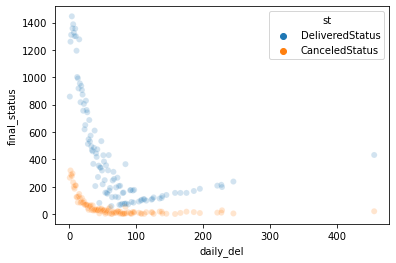

In [59]:
sns.scatterplot(data=data, x='daily_del', y='final_status', hue='st', alpha=0.2)

In [60]:
from category_encoders import TargetEncoder

In [61]:
te = TargetEncoder()
dftrain['store_enc'] = te.fit_transform(dftrain['store_address'],dftrain.status)

/opt/homebrew/Caskroom/miniforge/base/envs/py38_ds/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [4]:
# import os
# os.environ['KMP_DUPLICATE_LIB_OK']='True'

clf = XGBClassifier()
cols = ['store_enc', 'daily_del', 'products_total','n_of_products','hour']

clf.fit(dftrain[cols],dftrain.status)

NameError: name 'XGBClassifier' is not defined

In [3]:
f1_score(dftrain.status, clf.predict(dftrain[cols]).round(), average='macro')

NameError: name 'f1_score' is not defined

In [188]:
preds = clf.predict(dftrain[cols])
for th in np.linspace(0,1,11):
    res = (preds > th).astype(int)
    print(f'Threshold: {th}')
    print(f1_score(dftrain.status, res, average='macro'))
    print(confusion_matrix(dftrain.status, res))

Threshold: 0.0
0.6365615023180837
[[36623 11875]
 [ 1077  4755]]
Threshold: 0.1
0.6365615023180837
[[36623 11875]
 [ 1077  4755]]
Threshold: 0.2
0.6365615023180837
[[36623 11875]
 [ 1077  4755]]
Threshold: 0.30000000000000004
0.6365615023180837
[[36623 11875]
 [ 1077  4755]]
Threshold: 0.4
0.6365615023180837
[[36623 11875]
 [ 1077  4755]]
Threshold: 0.5
0.6365615023180837
[[36623 11875]
 [ 1077  4755]]
Threshold: 0.6000000000000001
0.6365615023180837
[[36623 11875]
 [ 1077  4755]]
Threshold: 0.7000000000000001
0.6365615023180837
[[36623 11875]
 [ 1077  4755]]
Threshold: 0.8
0.6365615023180837
[[36623 11875]
 [ 1077  4755]]
Threshold: 0.9
0.6365615023180837
[[36623 11875]
 [ 1077  4755]]
Threshold: 1.0
0.47164196522348
[[48498     0]
 [ 5832     0]]
